In [1]:
#importing standard libraries.  More esoteric libraries
#will be imported down below as needed

import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

import re

In [2]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use("ggplot")

In [3]:
#import data set as dataframe and use smaller subset
#for simple modeling purposes
df=pd.read_csv("data/rotten_tomatoes_reviews.csv")
df_quick = df[:10000]
df_quick


Freshness                                             Review
0             1   Manakamana doesn't answer any questions, yet ...
1             1   Wilfully offensive and powered by a chest-thu...
2             0   It would be difficult to imagine material mor...
3             0   Despite the gusto its star brings to the role...
4             0   If there was a good idea at the core of this ...
5             0   Gleeson goes the Hallmark Channel route, dama...
6             1   It was the height of satire in 1976: dark as ...
7             0   Everyone in "The Comedian" deserves a better ...
8             0   Actor encourages grumpy Christians to embrace...
9             1          Slight, contained, but ineffably soulful.
10            1   Bell's debut feature addresses its subject wi...
11            1   ... except for its shamelessly (and irresisti...
12            0   This is not one for the uninitiated. It's als...
13            1   Son of Saul employs the formal mechanics of f...
14            0   It isn't thrilling. Fox can't act. The backch...
15            0   Hiddleston and Swinton are lovely to watch, b...
16            1   Yossi is a stronger film than its predecessor...
17            1   I feel like a Sparkle Baby just puked rainbow...
18            0                              Long, unfocused film.
19            1   Kubo and the Two Strings is better than immer...
20            0   Easy to enjoy, if you're at all susceptible t...
21            1   An extraordinary blast from the past, X-Men: ...
22            1   Mostly lightweight, but the most interesting ...
23            1   Drawn, per a disclaimer, from period accounts...
24            1   ... hones its dramatic elements to emotional ...
25            0   What seemed like a decent idea - a fourth and...
26            0   Free Birds is unappealingly staged and paced ...
27            0   A joyless, misanthropic 105 minutes worth of ...
28            0   This one, directed by John Glen, just follows...
29            1   The movie is purely visceral, generating adre...
...         ...                                                ...
9970          0   There's nothing worthwhile about a single mom...
9971          0   The story stagnates with the null drawing of ...
9972          1   Writer/director Paul Thomas Anderson's period...
9973          0   The only reasons to see this structurally mes...
9974          0   I've never seen Kristen Bell more unlikable a...
9975          0   Mann seems undecided about what he wants Enem...
9976          0   Gigi is dressed to kill, but if all the Frenc...
9977          1   Tells a specifically Chinese story, and yet i...
9978          0   Man of Steel starts feeling like just another...
9979          0   The sex was good but the delirious lesbian mu...
9980          1   There is so much attention to detail, it's ge...
9981          1   While none of it's anything particularly spec...
9982          1   Hayek and Lithgow are outstanding in their le...
9983          0   [VIDEO ESSAY] Indolent pacing combines with t...
9984          0   The least fun of the three: overworked and un...
9985          1   Extremely original masterpiece in British cinema
9986          1   The pugnacious John C. is gifted and knows no...
9987          1   Saoirse Ronan plays this interior drama with ...
9988          1   Karolina Gruszka is very good as Curie, conve...
9989          1   An altogether astonishing film, not in the le...
9990          0   Scott's film can't quite decide whether it's ...
9991          1   More than just a not-so-instant replay...even...
9992          1   Screenwriter Rebecca Frayn's full feature deb...
9993          0   The cast adds little. Columbus Short, a dance...
9994          1   But the film's fascination lies less in its p...
9995          0   Can a video game turn a movie into a hit, man...
9996          0   If you swallow this type of thing no matter w...
9997          1   It all escalates into an arch, know

In [45]:
#using regexp notation to get rid of numbers in reviews
df_new = df_quick.copy()
df_new["Review"] = df_new["Review"].str.replace(r'([^a-zA-Z\s]+?)'," ")
df_new.Review[0]
# r"\d+"

' Manakamana doesn t answer any questions  yet makes its point  Nepal  like the rest of our planet  is a picturesque but far from peaceable kingdom '

In [5]:
#create a model to make a word counts matrix from the docs
#This model will lowercase words, stip accents, take out english stop words, and 
# take out obscure words, and possibly words that appear to often

count_vect = CountVectorizer(lowercase=True, tokenizer=None, strip_accents= "ascii", stop_words='english',
                             analyzer='word', max_df=1.0, min_df=2,ngram_range=(1,4),
                             max_features=3000)
X_train_counts = count_vect.fit_transform(df_quick.Review.values)

In [6]:
# These are the words in our vocabulary to serve as 
# feature names
feature_names = count_vect.get_feature_names()
feature_names

['ability',
 'able',
 'absolute',
 'absolutely',
 'absorbing',
 'absurd',
 'accessible',
 'accomplished',
 'account',
 'accurate',
 'achieve',
 'achievement',
 'achieves',
 'act',
 'acted',
 'acting',
 'action',
 'action film',
 'action movie',
 'action movies',
 'action packed',
 'action scenes',
 'action sequences',
 'action set',
 'actor',
 'actors',
 'actress',
 'acts',
 'actual',
 'actually',
 'ad',
 'adam',
 'adam sandler',
 'adaptation',
 'adaptations',
 'adapted',
 'add',
 'addition',
 'adds',
 'admirable',
 'admirably',
 'admire',
 'admit',
 'adolescent',
 'adult',
 'adults',
 'adventure',
 'aesthetic',
 'affair',
 'affecting',
 'affleck',
 'afraid',
 'african',
 'age',
 'agenda',
 'agent',
 'ages',
 'aggressively',
 'ago',
 'ahead',
 'aimed',
 'aims',
 'ain',
 'air',
 'al',
 'alas',
 'albeit',
 'alfred',
 'alien',
 'alike',
 'alive',
 'allen',
 'allowed',
 'allows',
 'amazing',
 'ambiguity',
 'ambition',
 'ambitions',
 'ambitious',
 'america',
 'american',
 'americans',
 'ami

In [7]:
#create bag of words dictionary to get lookup table
# for words in matrix
for key in sorted(count_vect.vocabulary_.keys()):
    print("{0:<20s} {1}".format(key, count_vect.vocabulary_[key]))

ability              0
able                 1
absolute             2
absolutely           3
absorbing            4
absurd               5
accessible           6
accomplished         7
account              8
accurate             9
achieve              10
achievement          11
achieves             12
act                  13
acted                14
acting               15
action               16
action film          17
action movie         18
action movies        19
action packed        20
action scenes        21
action sequences     22
action set           23
actor                24
actors               25
actress              26
acts                 27
actual               28
actually             29
ad                   30
adam                 31
adam sandler         32
adaptation           33
adaptations          34
adapted              35
add                  36
addition             37
adds                 38
admirable            39
admirably            40
admire               41
ad

showcase             2356
showing              2357
shows                2358
shyamalan            2359
sides                2360
sight                2361
significant          2362
silence              2363
silliness            2364
silly                2365
silver               2366
similar              2367
simon                2368
simple               2369
simplicity           2370
simplistic           2371
simply               2372
simultaneously       2373
sin                  2374
sincerity            2375
sing                 2376
singing              2377
single               2378
singular             2379
sinister             2380
sink                 2381
sit                  2382
sitcom               2383
sitting              2384
situation            2385
situations           2386
size                 2387
sketch               2388
skill                2389
skin                 2390
slapstick            2391
slasher              2392
sleep                2393
slice       

In [8]:
count_vect.vocabulary_.keys()

dict_keys(['doesn', 'answer', 'questions', 'makes', 'point', 'like', 'rest', 'far', 'kingdom', 'offensive', 'good', 'clean', 'fun', 'difficult', 'imagine', 'material', 'wrong', 'lost', 'despite', 'gusto', 'star', 'brings', 'role', 'hard', 'ride', 'discovery', 'idea', 'core', 'film', 'buried', 'jokes', 'dog', 'bad', 'ridiculous', 'plot', 'good idea', 'goes', 'channel', 'intermittently', 'curious', 'entry', 'time', 'travel', 'height', 'satire', 'dark', 'hell', 'absurd', 'surely', 'close', 'reality', 'era', 'deserves', 'better', 'movie', 'deserves better', 'better movie', 'actor', 'embrace', 'season', 'slight', 'bell', 'debut', 'feature', 'subject', 'humor', 'intelligence', 'issue', 'performance', 'shamelessly', 'music', 'score', 'director', 'halloween', 'achieves', 'considerable', 'power', 'entirely', 'visual', 'means', 'people', 'action', 'thrills', 'son', 'filmmaking', 'turn', 'doing', 'cinema', 'does', 'best', 'hands', 'great', 'filmmakers', 'showing', 'telling', 'does best', 'isn', '

In [9]:
#check to see if I can look up a word from count vect
# matrix which is in a particular document. Yes!
type(count_vect.vocabulary_)
for key in count_vect.vocabulary_.keys():
    if count_vect.vocabulary_[key]==2323:
        print(key)


set piece


In [10]:
# stop words currently in "english". Could add to this 
# list later.
count_vect.get_stop_words()

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [11]:
#Convert from sparse array to numpy array
X_train_counts
X_train_counts_arr = X_train_counts.toarray()
type(X_train_counts_arr[0][0])

numpy.int64

In [12]:
# getting indices of features in matrix for doc1
type(X_train_counts_arr)
ind = X_train_counts[0].nonzero()
ind[1]

array([1483,  955, 2165, 1554, 1973, 1644, 2081,  102,  728], dtype=int32)

In [13]:
# showing words in doc 1 that are represented in counts matrix
type(count_vect.vocabulary_)
for key in count_vect.vocabulary_.keys():
    if count_vect.vocabulary_[key] in ind[1]:
        print(key)

doesn
answer
questions
makes
point
like
rest
far
kingdom


 do I want to stem or lemmatize?
 much adieu about nothing!!!  However, I do want to take out the numbers...they are driving me crazy....regex to the rescue. Also, why doesn't peace show up in doc 1?

In [14]:
from nltk.tokenize import word_tokenize, wordpunct_tokenize, RegexpTokenizer

In [15]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

In [16]:
# 1. Create a set of documents.
corpus = [' '.join(df_quick['Review']).lower() for row in df_quick]
print(corpus)

[' manakamana doesn t answer any questions  yet makes its point  nepal  like the rest of our planet  is a picturesque but far from peaceable kingdom   wilfully offensive and powered by a chest thumping machismo  but it s good clean fun   it would be difficult to imagine material more wrong for spade than lost   found   despite the gusto its star brings to the role  it s hard to ride shotgun on hector s voyage of discovery   if there was a good idea at the core of this film  it s been buried in an unsightly pile of flatulence jokes  dog related bad puns and a ridiculous serial arson plot   gleeson goes the hallmark channel route  damaging an intermittently curious entry in the time travel subgenre   it was the height of satire in       dark as hell  but patently absurd and surely nowhere close to objective reality  objective reality surpassed it somewhere in the jerry springer era   everyone in  the comedian  deserves a better movie than  the comedian    actor encourages grumpy christia

In [17]:
df_corpus = df_quick["Review"].str.replace(r'([^a-zA-Z\s]+?)'," ")
bag_of_words = " ".join(df_corpus)
bag_of_words.lower()
df_corpus =df_corpus.str.lower()

In [18]:
# 2. Create a set of tokenized documents.
docs_tokenized = [word_tokenize(content) for content in df_corpus]
docs_tokenized


[['manakamana',
  'doesn',
  't',
  'answer',
  'any',
  'questions',
  'yet',
  'makes',
  'its',
  'point',
  'nepal',
  'like',
  'the',
  'rest',
  'of',
  'our',
  'planet',
  'is',
  'a',
  'picturesque',
  'but',
  'far',
  'from',
  'peaceable',
  'kingdom'],
 ['wilfully',
  'offensive',
  'and',
  'powered',
  'by',
  'a',
  'chest',
  'thumping',
  'machismo',
  'but',
  'it',
  's',
  'good',
  'clean',
  'fun'],
 ['it',
  'would',
  'be',
  'difficult',
  'to',
  'imagine',
  'material',
  'more',
  'wrong',
  'for',
  'spade',
  'than',
  'lost',
  'found'],
 ['despite',
  'the',
  'gusto',
  'its',
  'star',
  'brings',
  'to',
  'the',
  'role',
  'it',
  's',
  'hard',
  'to',
  'ride',
  'shotgun',
  'on',
  'hector',
  's',
  'voyage',
  'of',
  'discovery'],
 ['if',
  'there',
  'was',
  'a',
  'good',
  'idea',
  'at',
  'the',
  'core',
  'of',
  'this',
  'film',
  'it',
  's',
  'been',
  'buried',
  'in',
  'an',
  'unsightly',
  'pile',
  'of',
  'flatulence',


In [19]:
# 3. Strip out stop words from each tokenized document.
stop = set(stopwords.words('english'))
docs_stop = [[word for word in words if word not in stop] for words in docs_tokenized]
docs_stop

[['manakamana',
  'answer',
  'questions',
  'yet',
  'makes',
  'point',
  'nepal',
  'like',
  'rest',
  'planet',
  'picturesque',
  'far',
  'peaceable',
  'kingdom'],
 ['wilfully',
  'offensive',
  'powered',
  'chest',
  'thumping',
  'machismo',
  'good',
  'clean',
  'fun'],
 ['would',
  'difficult',
  'imagine',
  'material',
  'wrong',
  'spade',
  'lost',
  'found'],
 ['despite',
  'gusto',
  'star',
  'brings',
  'role',
  'hard',
  'ride',
  'shotgun',
  'hector',
  'voyage',
  'discovery'],
 ['good',
  'idea',
  'core',
  'film',
  'buried',
  'unsightly',
  'pile',
  'flatulence',
  'jokes',
  'dog',
  'related',
  'bad',
  'puns',
  'ridiculous',
  'serial',
  'arson',
  'plot'],
 ['gleeson',
  'goes',
  'hallmark',
  'channel',
  'route',
  'damaging',
  'intermittently',
  'curious',
  'entry',
  'time',
  'travel',
  'subgenre'],
 ['height',
  'satire',
  'dark',
  'hell',
  'patently',
  'absurd',
  'surely',
  'nowhere',
  'close',
  'objective',
  'reality',
  'ob

In [20]:
# Stemming / Lemmatization

# 1. Stem using both stemmers and the lemmatizer
porter = PorterStemmer()
snowball = SnowballStemmer('english')
wordnet = WordNetLemmatizer()
docs_porter = [[porter.stem(word) for word in words] for words in docs_stop]
docs_snowball = [[snowball.stem(word) for word in words] for words in docs_stop]
docs_wordnet = [[wordnet.lemmatize(word) for word in words] for words in docs_stop]
docs_wordnet


[['manakamana',
  'answer',
  'question',
  'yet',
  'make',
  'point',
  'nepal',
  'like',
  'rest',
  'planet',
  'picturesque',
  'far',
  'peaceable',
  'kingdom'],
 ['wilfully',
  'offensive',
  'powered',
  'chest',
  'thumping',
  'machismo',
  'good',
  'clean',
  'fun'],
 ['would',
  'difficult',
  'imagine',
  'material',
  'wrong',
  'spade',
  'lost',
  'found'],
 ['despite',
  'gusto',
  'star',
  'brings',
  'role',
  'hard',
  'ride',
  'shotgun',
  'hector',
  'voyage',
  'discovery'],
 ['good',
  'idea',
  'core',
  'film',
  'buried',
  'unsightly',
  'pile',
  'flatulence',
  'joke',
  'dog',
  'related',
  'bad',
  'pun',
  'ridiculous',
  'serial',
  'arson',
  'plot'],
 ['gleeson',
  'go',
  'hallmark',
  'channel',
  'route',
  'damaging',
  'intermittently',
  'curious',
  'entry',
  'time',
  'travel',
  'subgenre'],
 ['height',
  'satire',
  'dark',
  'hell',
  'patently',
  'absurd',
  'surely',
  'nowhere',
  'close',
  'objective',
  'reality',
  'objectiv

In [21]:
docs_wordnet
new_element =[]
for element in docs_wordnet:
    test = " ".join(element)
    new_element.append(test) 
type(new_element)
new_series = pd.Series(new_element)
new_series
col = "text"
new_df = pd.DataFrame(new_series,columns = [col])
new_df

text
0     manakamana answer question yet make point nepa...
1     wilfully offensive powered chest thumping mach...
2     would difficult imagine material wrong spade l...
3     despite gusto star brings role hard ride shotg...
4     good idea core film buried unsightly pile flat...
5     gleeson go hallmark channel route damaging int...
6     height satire dark hell patently absurd surely...
7      everyone comedian deserves better movie comedian
8      actor encourages grumpy christian embrace season
9                    slight contained ineffably soulful
10    bell debut feature address subject humor intel...
11    except shamelessly irresistibly zingy music sc...
12    one uninitiated also one people like action th...
13    son saul employ formal mechanic filmmaking tur...
14              thrilling fox act backchat filthy funny
15            hiddleston swinton lovely watch need chew
16    yossi stronger film predecessor deeply felt le...
17    feel like sparkle baby puked rainbow colored d...
18                                  long unfocused film
19    kubo two string better immersive absorptive pu...
20    easy enjoy susceptible sort thing leaf nothing...
21    extraordinary blast past x men first class go ...
22    mostly lightweight interesting part movie jami...
23    drawn per disclaimer period account strange ph...
24    hone dramatic element emotional effect rather ...
25    seemed like decent idea fourth final stroll am...
26    free bird unappealingly staged paced uneven sl...
27    joyless misanthropic minute worth comedy rate ...
28    one directed john glen follows number plodding...
29    movie purely visceral generating adrenaline al...
...                                                 ...
9970  nothing worthwhile single moment even prurient...
9971  story stagnates null drawing character cadence...
9972  writer director paul thomas anderson period pi...
9973  reason see structurally messy poorly directed ...
9974  never seen kristen bell unlikable kelsey gramm...
9975  mann seems undecided want enemy accomplish try...
9976  gigi dressed kill french finery impress custom...
9977  tell specifically chinese story yet completely...
9978  man steel start feeling like another generic s...
9979  sex good delirious lesbian mumblecore leave la...
9980  much attention detail genuinely fun look imagi...
9981  none anything particularly spectacular memorab...
9982  hayek lithgow outstanding lead role spiritual ...
9983  video essay indolent pacing combine tone deaf ...
9984              least fun three overworked uninspired
9985      extremely original masterpiece british cinema
9986  pugnacious john c gifted know bound walking ha...
9987  saoirse ronan play interior drama intelligence...
9988  karolina gruszka good curie conveying mix inte...
9989  altogether astonishing film least winter bone ...
9990  scott film quite decide whether fully behind a...
9991  instant replay even viewer regularly skip supe...
9992  screenwriter rebecca frayn full feature debut ...
9993  cast add little columbus short dancer turned a...
9994  film fascination lie le portrait grievously fl...
9995  video game turn movie hit man maybe mean hitma...
9996  swallow type thing matter proceed without caut...
9997  escalates arch knowing throwback horror thrill...
9998                 witless even slasher film standard
9999  work filmmaker love cinema entirely certain ex...

[10000 rows x 1 columns]

Now, I have a dataframe with a really good stemmed and cleaned text. Let's get the official countvectorized matrix and take a look at it.

In [22]:
cv = CountVectorizer(lowercase=True, tokenizer=None, strip_accents= "ascii", stop_words="english",
                             analyzer='word', max_df=1.0, min_df=2,ngram_range=(1,4),
                             max_features=3000)
X_train_counts_final = cv.fit_transform(new_df.text.values)
X_train_counts_final
X_train_counts_final_arr = X_train_counts_final.toarray()
X_train_counts_final_arr.shape

(10000, 3000)

In [23]:
stopwords
new_stopwords = set(["film","movie","like","feel","time","little","adject", "adds",
                   "bestloved","agonizingly","bantamweight"])
new_stopwords
stopwords.update(new_stopwords)
stopwords


In [24]:
feature_names2 = cv.get_feature_names()
feature_names2

['ability',
 'able',
 'absence',
 'absolute',
 'absolutely',
 'absorbing',
 'absurd',
 'abuse',
 'accent',
 'accessible',
 'accomplished',
 'accomplishment',
 'account',
 'accurate',
 'achieve',
 'achieved',
 'achievement',
 'achieves',
 'act',
 'acted',
 'acting',
 'action',
 'action comedy',
 'action film',
 'action flick',
 'action movie',
 'action packed',
 'action scene',
 'action sequence',
 'action set',
 'action set piece',
 'actor',
 'actress',
 'actual',
 'actually',
 'ad',
 'adam',
 'adam sandler',
 'adaptation',
 'adapted',
 'add',
 'addition',
 'admirable',
 'admirably',
 'admire',
 'admit',
 'adolescent',
 'adult',
 'advance',
 'adventure',
 'aesthetic',
 'affair',
 'affecting',
 'affection',
 'affleck',
 'afraid',
 'african',
 'age',
 'agenda',
 'agent',
 'aggressively',
 'ago',
 'ahead',
 'aim',
 'aimed',
 'air',
 'al',
 'ala',
 'albeit',
 'alfred',
 'alien',
 'alike',
 'alive',
 'allen',
 'allowed',
 'allows',
 'amazing',
 'ambiguity',
 'ambition',
 'ambitious',
 'amer

In [25]:
#create bag of words dictionary to get lookup table
# for words in matrix
for key in sorted(cv.vocabulary_.keys()):
    print("{0:<20s} {1}".format(key, cv.vocabulary_[key]))

ability              0
able                 1
absence              2
absolute             3
absolutely           4
absorbing            5
absurd               6
abuse                7
accent               8
accessible           9
accomplished         10
accomplishment       11
account              12
accurate             13
achieve              14
achieved             15
achievement          16
achieves             17
act                  18
acted                19
acting               20
action               21
action comedy        22
action film          23
action flick         24
action movie         25
action packed        26
action scene         27
action sequence      28
action set           29
action set piece     30
actor                31
actress              32
actual               33
actually             34
ad                   35
adam                 36
adam sandler         37
adaptation           38
adapted              39
add                  40
addition             41
ad

seeking              2306
seemingly            2307
seen                 2308
seldom               2309
self                 2310
self consciously     2311
sell                 2312
selling              2313
semi                 2314
send                 2315
sense                2316
sense humor          2317
sensibility          2318
sensitive            2319
sensitivity          2320
sentiment            2321
sentimental          2322
sentimentality       2323
sequel               2324
sequence             2325
serf                 2326
series               2327
seriously            2328
serve                2329
served               2330
service              2331
serviceable          2332
set                  2333
set piece            2334
setting              2335
settle               2336
setup                2337
seven                2338
sex                  2339
sexual               2340
sexy                 2341
shade                2342
shadow               2343
shaking     

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
tfidf_transformer = TfidfTransformer(use_idf=True)
tfidf_transformer.fit(X_train_counts)
X_train_tfidf = tfidf_transformer.transform(X_train_counts)
X_train_tfidf_arr = X_train_tfidf.toarray()

In [28]:
type(X_train_tfidf_arr)

numpy.ndarray

In [29]:
from collections import Counter, defaultdict

import seaborn as sns
sns.set(style="darkgrid")
sns.set(font_scale=1.3)

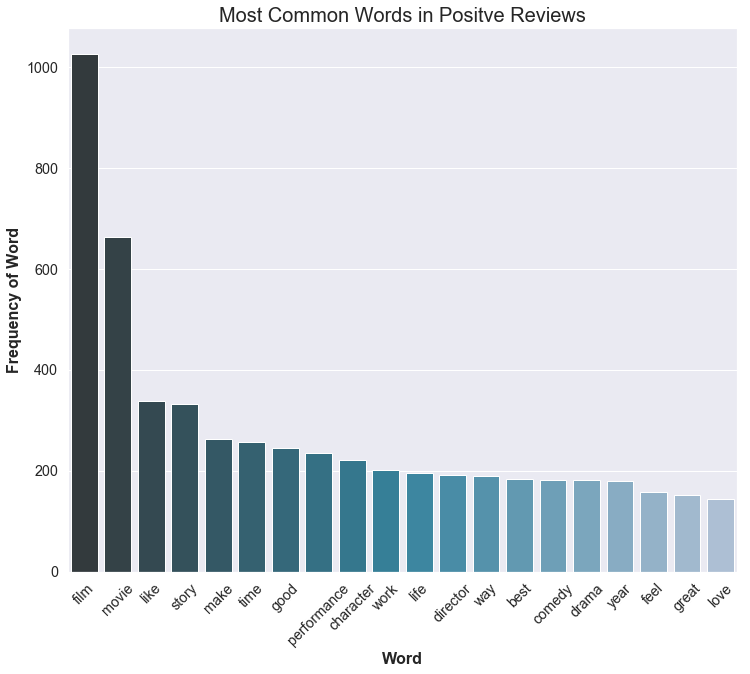

In [30]:
df_pos = new_df[df_quick["Freshness"]==1]
df_pos
X_train_counts_pos = cv.transform(df_pos["text"].values)
word_freq_pos = dict(zip(cv.get_feature_names(), np.asarray(X_train_counts_pos.sum(axis=0)).ravel()))
word_counter_pos = Counter(word_freq_pos)
word_counter_df_pos = pd.DataFrame(word_counter_pos.most_common(20), columns = ['word', 'freq'])
df_neg = new_df[df_quick["Freshness"]==0]
X_train_counts_neg = cv.transform(df_neg["text"].values)
word_freq_neg = dict(zip(count_vect.get_feature_names(), np.asarray(X_train_counts_neg.sum(axis=0)).ravel()))
word_counter_neg = Counter(word_freq_neg)
word_counter_df_neg = pd.DataFrame(word_counter_neg.most_common(20), columns = ['word', 'freq'])

fig, ax = plt.subplots(figsize=(12, 10))
#plt.subplot(1,2,1)
sns.barplot(x="word", y="freq", data=word_counter_df_pos, palette="PuBuGn_d", ax=ax)
#plt.subplot(1,2,2)
#ax[0,1]= sns.barplot(x="word", y="freq", data=word_counter_df_neg, palette="PuBuGn_d", ax=ax)
plt.xlabel("Word", fontsize=16, fontweight ="bold")
plt.ylabel("Frequency of Word",fontsize = 16,fontweight="bold")
plt.xticks(rotation=45)
plt.title("Most Common Words in Positve Reviews",fontsize=20)
plt.savefig("images/most_common_words_pos")
plt.show();

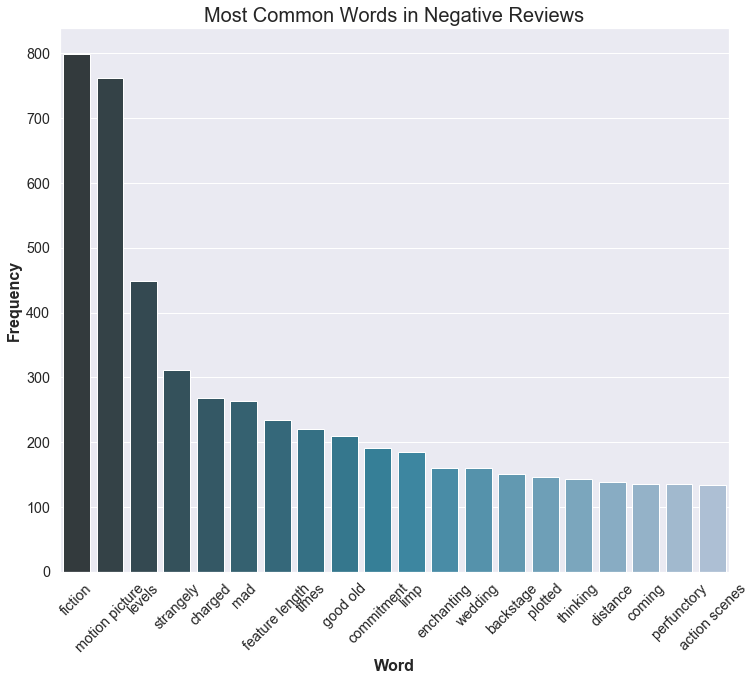

In [31]:
fig, ax = plt.subplots(figsize=(12, 10))
#plt.subplot(1,2,1)
sns.barplot(x="word", y="freq", data=word_counter_df_neg, palette="PuBuGn_d", ax=ax)
#plt.subplot(1,2,2)
#ax[0,1]= sns.barplot(x="word", y="freq", data=word_counter_df_neg, palette="PuBuGn_d", ax=ax)
plt.xticks(rotation=45)
plt.xlabel("Word",fontsize =16, fontweight="bold")
plt.ylabel("Frequency",fontsize =16, fontweight="bold")
plt.title("Most Common Words in Negative Reviews",fontsize=20)
plt.savefig("images/most_common_words_neg")
plt.show();

In [32]:
from os import path
#from PIL import image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

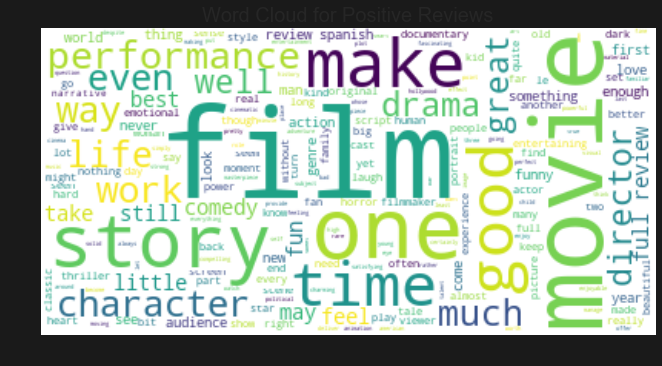

In [33]:
df_pos.head()
temp = df_pos["text"].values
text= " ".join(review for review in temp)
stopwords = set(STOPWORDS)
wordcloud =WordCloud(stopwords=stopwords, background_color="white").generate(text)
fig = plt.figure(figsize = (9,6),facecolor="k")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Word Cloud for Positive Reviews", fontsize=20)
plt.savefig("images/word_cloud.png")
plt.show()

In [34]:
from sklearn.naive_bayes import MultinomialNB

In [35]:
# print('\nTraining a Naive Bayes model.')
nb_model = MultinomialNB(alpha=1.0, fit_prior=False, class_prior=None)
y=df_quick["Freshness"].values
nb_model.fit(X_train_tfidf_arr, y)
type(X_train_tfidf_arr)

numpy.ndarray

In [36]:
df_test = df[40000:42500]
y_test = df_test["Freshness"].values
X_test = df_test["Review"].values
df_corpus_test = df_test["Review"].str.replace(r'([^a-zA-Z\s]+?)'," ")
bag_of_words = " ".join(df_corpus)
df_corpus_test =df_corpus_test.str.lower()
docs_tokenized_test = [word_tokenize(content) for content in df_corpus_test]
docs_stop_test = [[word for word in words if word not in stop] for words in docs_tokenized_test]
docs_wordnet_test = [[wordnet.lemmatize(word) for word in words] for words in docs_stop_test]
docs_wordnet_test

[['exultant', 'comedy', 'american', 'repression', 'revolt'],
 ['moving', 'term', 'invigorating', 'conversation', 'starter'],
 ['bullett',
  'raja',
  'director',
  'tigmanshu',
  'dhulia',
  'commercial',
  'film',
  'yet',
  'weakest'],
 ['infinitely',
  'polar',
  'bear',
  'vivid',
  'snapshot',
  'one',
  'family',
  'surviving',
  'state',
  'chaotic',
  'affectionate',
  'imperfection',
  'time',
  'kid',
  'raising',
  'seen',
  'neglect',
  'normal'],
 ['disney',
  'pixar',
  'animation',
  'quality',
  'especially',
  'appearance',
  'human',
  'lively',
  'fantasy',
  'pack',
  'enough',
  'tropical',
  'incident',
  'vivid',
  'action',
  'pas',
  'muster'],
 ['de', 'bont', 'simply', 'reprises', 'first', 'film'],
 ['least',
  'cinematic',
  'train',
  'look',
  'pretty',
  'run',
  'track',
  'driving',
  'home',
  'symbolism',
  'people',
  'theater',
  'full',
  'content',
  'review',
  'parent',
  'violence',
  'profanity',
  'nudity',
  'etc',
  'also',
  'available'],
 

In [37]:
new_element =[]
for element in docs_wordnet_test:
    test = " ".join(element)
    new_element.append(test) 
type(new_element)
new_series_test = pd.Series(new_element)
new_series_test
col = "text"
new_df_test = pd.DataFrame(new_series_test,columns = [col])
new_df_test

text
0            exultant comedy american repression revolt
1         moving term invigorating conversation starter
2     bullett raja director tigmanshu dhulia commerc...
3     infinitely polar bear vivid snapshot one famil...
4     disney pixar animation quality especially appe...
5                    de bont simply reprises first film
6     least cinematic train look pretty run track dr...
7     performance make material human accessible mai...
8     filmmaker possessed mutation travel back time ...
9     helen mirren commanding performance elizabeth ...
10    robert zemeckis walk breathtaking hope film ma...
11    dark shadow amusing fit spurt sure make ton mo...
12    saul dibb foamy adaptation amanda foreman geor...
13    anders danielsen lie give compelling deep etch...
14    actor support translates screen real communion...
15    surprisingly subtle take aging changing role r...
16    arguably spin control last act overall make wi...
17    movie think tomik pretty sick puppy kieslowski...
18    full insanely grand passion bloodthirsty viole...
19    movie raw ambition spirit literally reinvents ...
20    yes absolutely fun well many many thing go boo...
21    another sure fire cult hit mancini take chucky...
22    deliberately old fashioned ww adventure shine ...
23    extraordinary magical wondrous blessedly origi...
24           w fail drama comedy unclear sequence meant
25    miss sloane heroine driven craftiness film sub...
26    facial jewellery elvis costello music cell pho...
27          film effective need equalizer line see find
28    lifeless number production excruciating exerci...
29    predator gut slash way gory sci fi mediocrity ...
...                                                 ...
2470  none dahl gift dark humor sparkling writing ev...
2471  knight cup film feel something important say m...
2472  proof positive emperor comedy clothes fact see...
2473  comedic crimer late cycle tarantino retread py...
2474                             glorious new territory
2475  premise look film admittedly innovative scary ...
2476  took still shot one middle action sequence nee...
2477  duff make long comparatively dostoyevskian dep...
2478  maturely written richly characterized flawless...
2479     scare quote around movie title never necessary
2480  hero iconic inertia photographed molten sky ju...
2481                            different anything came
2482               loud garish untimely romantic comedy
2483  emotionally rewarding reunion tour established...
2484  film delight aspect disappoints others deft jo...
2485  would take actual work get absolutely everythi...
2486  bad leslie dixon tapped le percent penning und...
2487  many reason treasure david lowery new film gho...
2488  joss whedon fan want miss shakespeare fan want...
2489  watching movie like going quantum physic sympo...
2490  make cousin rachel engaging audience never qui...
2491  audacious performance veteran actor wonderful ...
2492  many moving part spinning many direction movie...
2493  fool shame fool twice shame fool thrice sequel...
2494  quarantine unavoidable american replica versio...
2495  journey function primarily hopeful story peopl...
2496  fascinating doc couple son nazi war criminal o...
2497  one film running gag despite unfolding apocaly...
2498  much movie good work undone silly unconvincing...
2499  virtually one zion age except esteemed charact...

[2500 rows x 1 columns]

In [41]:
X_test_counts = cv.transform(df_test.Review.values)
#X_test_counts_arr = X_test_counts.toarray()
#X_test_counts_arr
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
X_test_arr = X_test_tfidf.toarray()
# #print(X_test_arr.shape)
# #X_test_std= scaler.fit_transform(X_temp)
# y_test = new_df_test["Freshness"].values
# #print(X_test_counts.shape)
# print(X_test_arr.shape)
nb_model.score(X_train_tfidf_arr,y)

0.8013

In [42]:
nb_model.score(X_test_arr, y_test)

0.5352

In [43]:
ans = nb_model.predict_proba(X_test_arr)
ans

array([[0.58444646, 0.41555354],
       [0.58165859, 0.41834141],
       [0.49263471, 0.50736529],
       ...,
       [0.43406165, 0.56593835],
       [0.45061808, 0.54938192],
       [0.40197582, 0.59802418]])

In [44]:
y_predict = nb_model.predict(X_test_arr)
y_predict

array([0, 0, 1, ..., 1, 1, 1])

In [44]:
sum(y_predict)

1198

In [45]:
from sklearn import metrics

In [46]:
metrics.confusion_matrix(y_test, y_predict)

array([[952, 335],
       [350, 863]])

In [47]:
#false positives
false_positives = new_df_test[y_predict > y_test]
false_positives

text
8     filmmaker possessed mutation travel back time ...
25    miss sloanes heroine driven craftiness film su...
38    world war ii movie dad fall asleep watching couch
62    stepford wife terrific comedy lousy motion pic...
70    although strives thought provoking exploration...
75              doesnt wit doesnt style best bond movie
79    make original urban legend look like alfred hi...
119   story whose appeal hinge saving grace getting ...
135   youre lucky rare figure robot fighting eventually
144   woodleys solid performance cant keep adrift st...
154   new film keep original story even original lin...
172   packed cliche there nothing remotely original ...
177   spectacular failure film aesthetic make tremen...
180   even ace editor walter murch struggle give coh...
182   mccall highminded talk seems take little much ...
187   july provocative honorably independent filmmak...
192   furtive figure history know best watergate sni...
196   whole seems meander aimlessly rarely creating ...
198   pulse erudition visual kick dulled impact time...
201   smattering effective moment creepy cinematogra...
204   amid episodic muddle din done yet feel assured...
211   even look past horror flick hopelessly flawed ...
213   typical pic adherence rigid genre convention f...
219   eastwood display futility iraq war given year ...
236   problem screen adaptation young adult novelsth...
240   john carter arriving late party george lucas a...
241   exhibitionist ferrell finding another excuse e...
263     youre looking allages crowdpleaser may best bet
268   dramatic theme echo great crime movie seventy ...
273          film never really explains g came he going
...                                                 ...
2245             rare action movie suffers action scene
2246  uninspiring bland eight leaf nothing greater a...
2252  gigli pretend sophisticated comedy sex yet wri...
2261  greatest puzzle surrounding tom hank latest fo...
2267  nun predictable modern horror offering exact o...
2278  solitary act could saved film would chosen scr...
2285  like trojan horse troy built shell first glanc...
2292  cold soul imitation kaufman written directed n...
2303  lagravenese horse whisperer tendency sanitize ...
2304                          even stork must move time
2310  authentic account stressedout parenting anyone...
2319  churning secret nostakes genre thriller dirtch...
2332  long string heavyfooted sight sound gag must s...
2341  waterboy arguably sandlers enjoyable motion pi...
2369                        one big fat schmaltzy drama
2371          finale best could say well ive seen worse
2379  kibitzing parent moral wiggle room godless wor...
2381  da sweet blood jesus bold wildly uneven bloody...
2389  new ghostbusters frequently funny although mov...
2394  akin favorite american idol contestant prematu...
2405  miracle modern technology film achieves alchem...
2407  gospel according republican michael moore turn...
2422  film never transcends subject matter informati...
2432  good life stylistically ambitious heartfelt fe...
2439  movie becomes another line ageold tale man gai...
2446  potentially exceptional story told flatly unex...
2465  rendition worst flaw political deckstacking wi...
2472  proof positive emperor comedy clothes fact see...
2475  premise look film admittedly innovative scary ...
2492  many moving part spinning many direction movie...

[335 rows x 1 columns]

In [38]:
#false negatives
false_neg = new_df_test[y_predict < y_test]
false_neg

NameError: name 'y_predict' is not defined

In [49]:
X_train_counts_fp = cv.transform(false_positives["text"].values)
word_freq_fp = dict(zip(cv.get_feature_names(), np.asarray(X_train_counts_fp.sum(axis=0)).ravel()))
word_counter_fp = Counter(word_freq_fp)
word_counter_df_fp = pd.DataFrame(word_counter_fp.most_common(20), columns = ['word', 'freq'])

X_train_counts_fn = cv.transform(false_neg["text"].values)
word_freq_fn = dict(zip(count_vect.get_feature_names(), np.asarray(X_train_counts_fn.sum(axis=0)).ravel()))
word_counter_fn = Counter(word_freq_fn)
word_counter_df_fn = pd.DataFrame(word_counter_fn.most_common(20), columns = ['word', 'freq'])



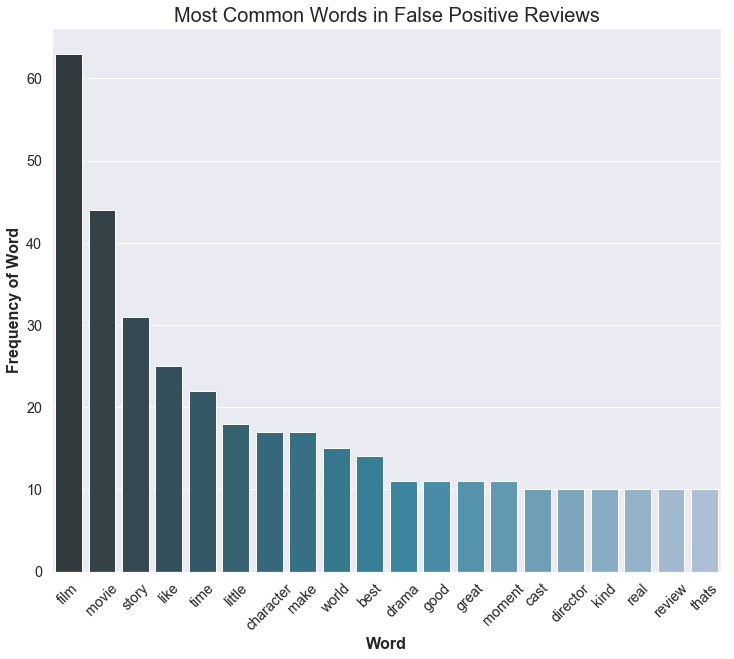

In [50]:
fig, ax = plt.subplots(figsize=(12, 10))
#plt.subplot(1,2,1)
sns.barplot(x="word", y="freq", data=word_counter_df_fp, palette="PuBuGn_d", ax=ax)
#plt.subplot(1,2,2)
#ax[0,1]= sns.barplot(x="word", y="freq", data=word_counter_df_neg, palette="PuBuGn_d", ax=ax)
plt.xlabel("Word", fontsize=16, fontweight ="bold")
plt.ylabel("Frequency of Word",fontsize = 16,fontweight="bold")
plt.xticks(rotation=45)
plt.title("Most Common Words in False Positive Reviews",fontsize=20)
plt.savefig("images/most_common_words_fp")
plt.show();

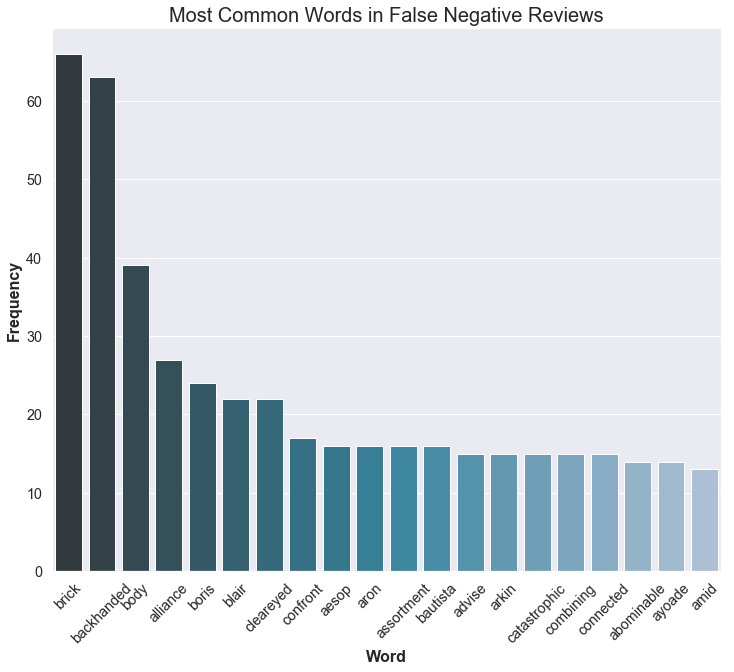

In [51]:
fig, ax = plt.subplots(figsize=(12, 10))
#plt.subplot(1,2,1)
sns.barplot(x="word", y="freq", data=word_counter_df_fn, palette="PuBuGn_d", ax=ax)
#plt.subplot(1,2,2)
#ax[0,1]= sns.barplot(x="word", y="freq", data=word_counter_df_neg, palette="PuBuGn_d", ax=ax)
plt.xticks(rotation=45)
plt.xlabel("Word",fontsize =16, fontweight="bold")
plt.ylabel("Frequency",fontsize =16, fontweight="bold")
plt.title("Most Common Words in False Negative Reviews",fontsize=20)
plt.savefig("images/most_common_words_fn")
plt.show();